In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [12]:
# Load the dataset
dataset = pd.read_csv('tested.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
# Info about Data 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [16]:
dataset = dataset.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [17]:
dataset['Sex'].replace({'male':0, 'female':1}, inplace = True)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN,Q
1,1,3,1,47.0,1,0,7.0000,NaN,S
2,0,2,0,62.0,0,0,9.6875,NaN,Q
3,0,3,0,27.0,0,0,8.6625,NaN,S
4,1,3,1,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,NaN,S
414,1,1,1,39.0,0,0,108.9000,C105,C
415,0,3,0,38.5,0,0,7.2500,NaN,S
416,0,3,0,NaN,0,0,8.0500,NaN,S


In [18]:
dataset['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace = True)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN,2
1,1,3,1,47.0,1,0,7.0000,NaN,0
2,0,2,0,62.0,0,0,9.6875,NaN,2
3,0,3,0,27.0,0,0,8.6625,NaN,0
4,1,3,1,22.0,1,1,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,NaN,0
414,1,1,1,39.0,0,0,108.9000,C105,1
415,0,3,0,38.5,0,0,7.2500,NaN,0
416,0,3,0,NaN,0,0,8.0500,NaN,0


In [19]:
# Handling mIssing values 
# Checking number of null values in a column
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [21]:
# Drop cabin column
dataset = dataset.drop(['Cabin'], axis = 1)

In [22]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,0
414,1,1,1,39.0,0,0,108.9000,1
415,0,3,0,38.5,0,0,7.2500,0
416,0,3,0,NaN,0,0,8.0500,0


In [23]:
# Fill missing age values with the median age
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)

In [24]:
# Fill missing fare values with the median fare
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

In [25]:
# Fill missing embarked values with the most common value
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [26]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


In [28]:
# Splitting the Data 
# Split the data into input features (X) and target variable (Y)
X = dataset.drop(['Survived'], axis = 1)
Y = dataset['Survived']

In [29]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [31]:
# Data Visualization 

In [32]:
sns.set(style='whitegrid') 

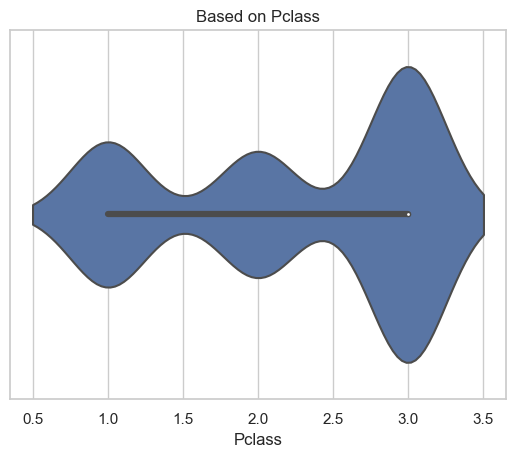

In [47]:
# To visualize survival based on Pclass
sns.violinplot(x = 'Pclass', hue='Survived', data = dataset)
plt.title('Based on Pclass')
plt.show()

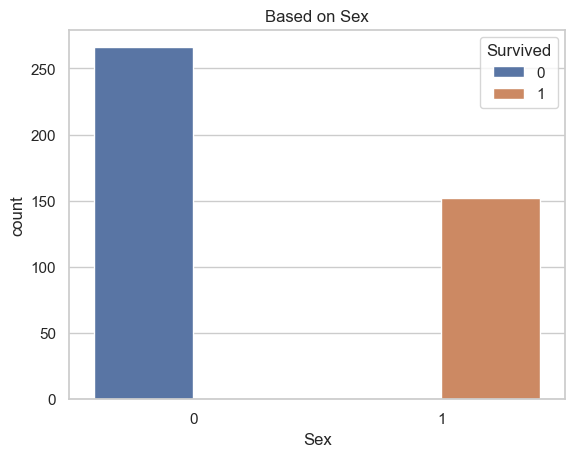

In [50]:
# To visualize survival based on Sex
sns.countplot(x = 'Sex', hue='Survived', data=dataset)
plt.title('Based on Sex')
plt.show()

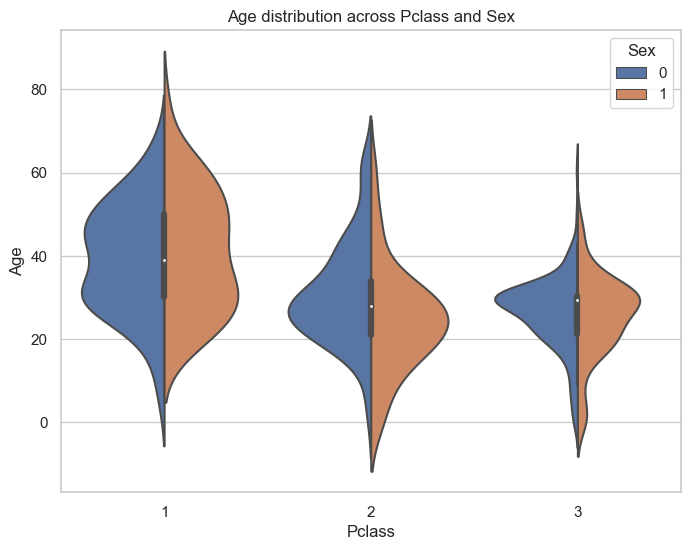

In [56]:
# To compare the distribution of Age for different Pclass and Sex
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', hue='Sex', split=True, data=dataset)
plt.title('Age distribution across Pclass and Sex')
plt.show()

<Figure size 800x600 with 0 Axes>

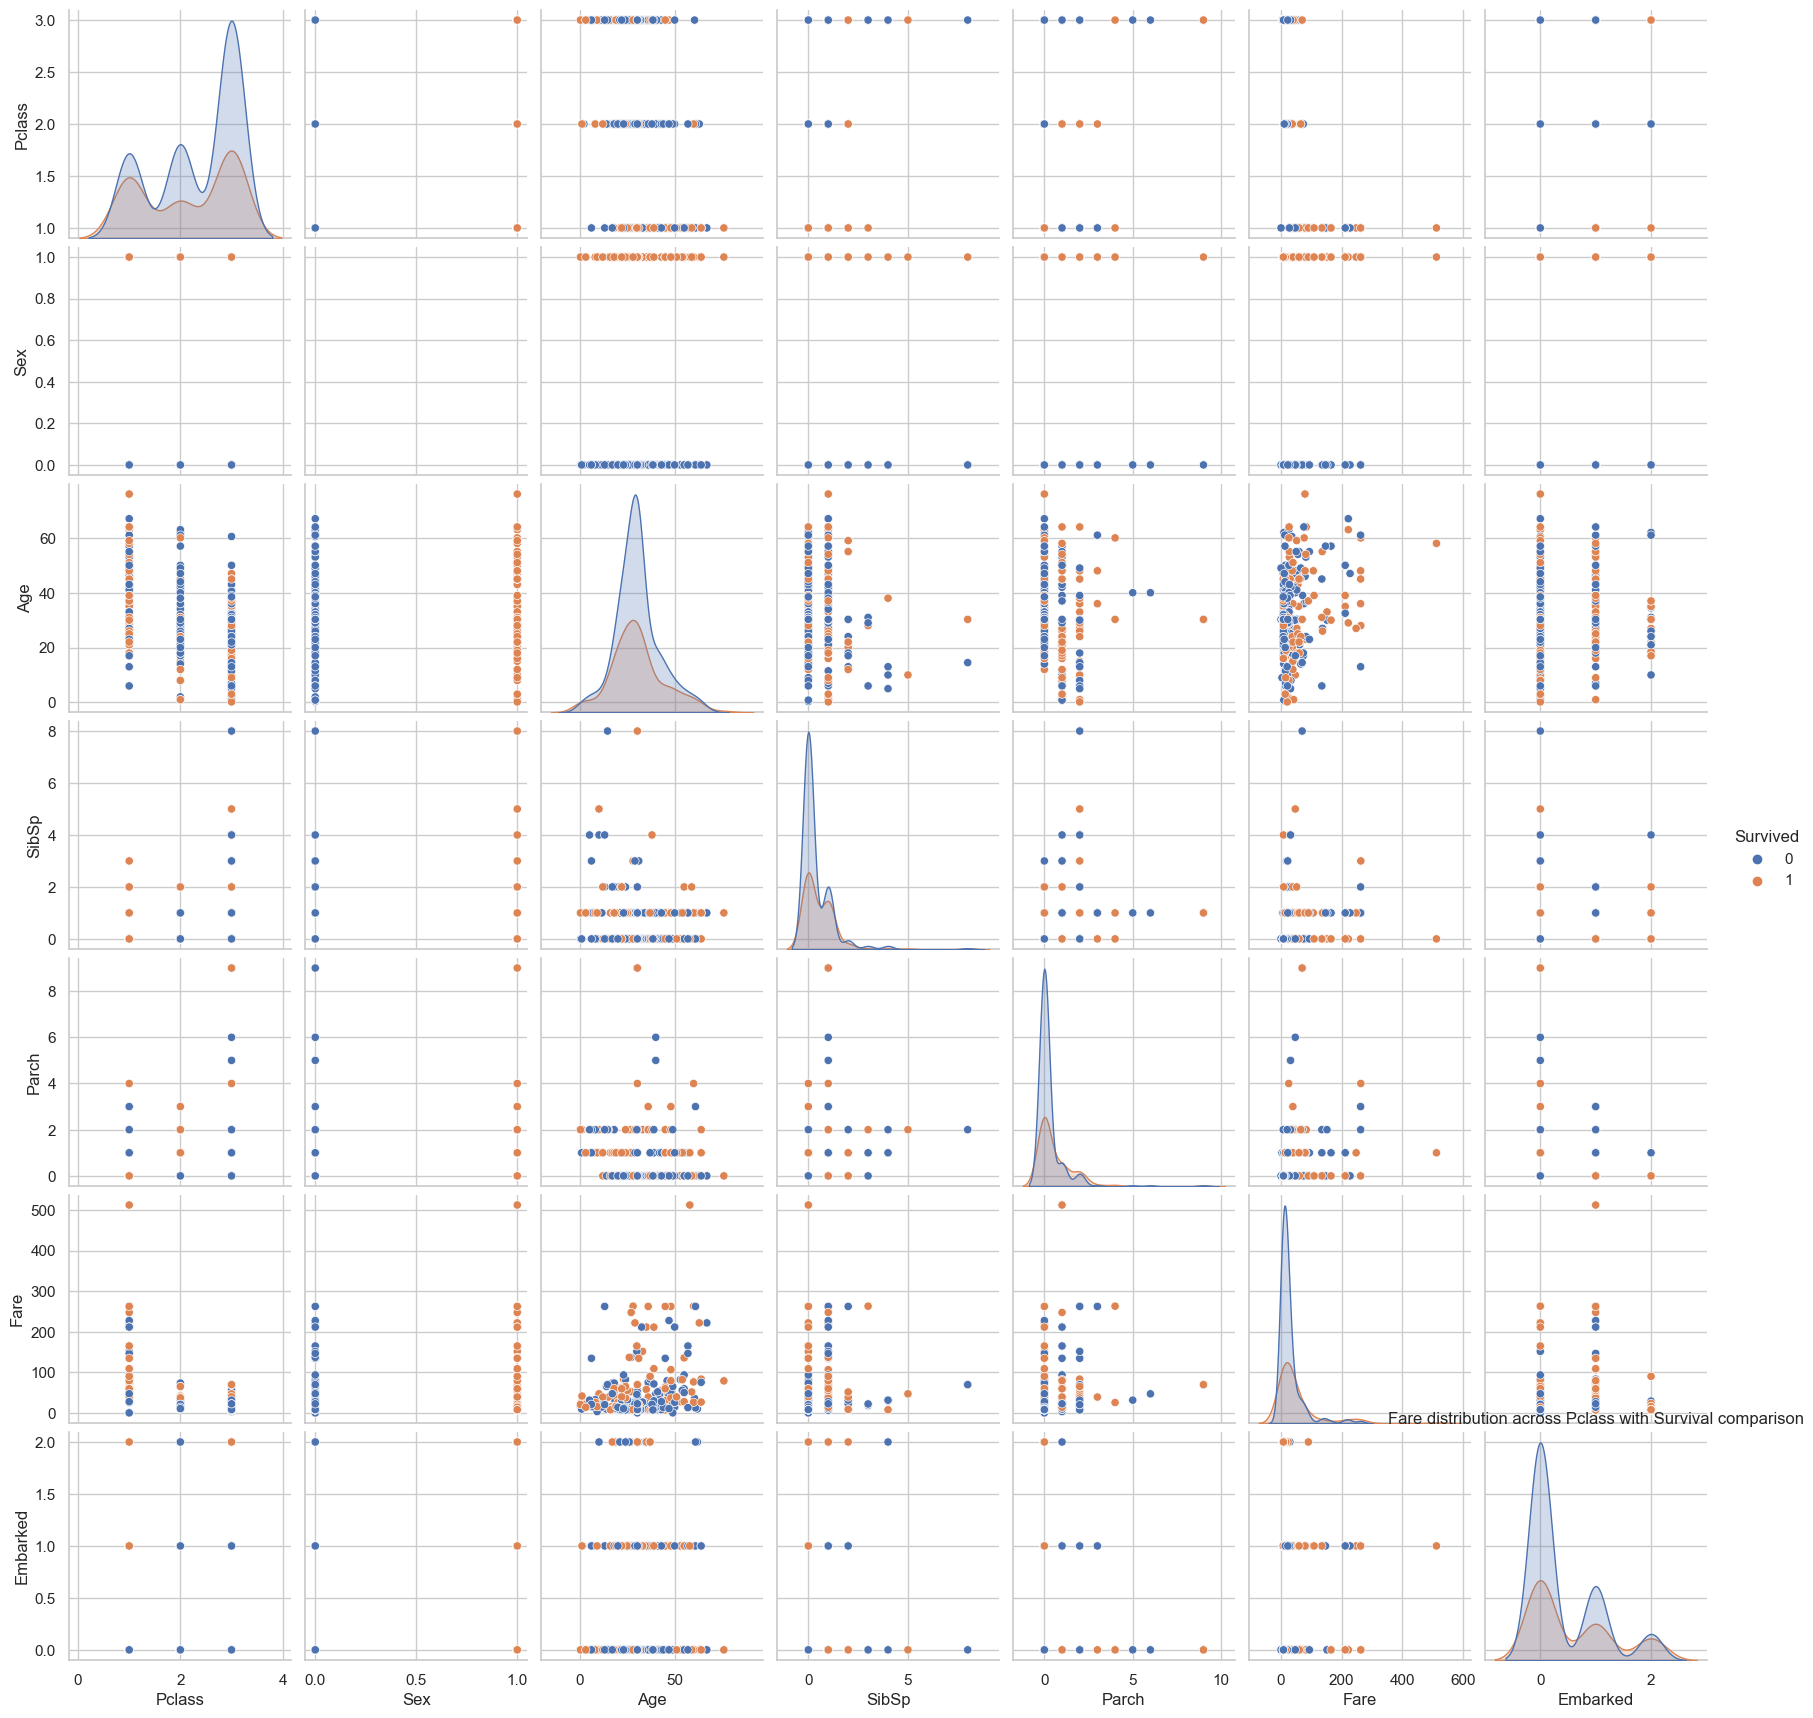

In [64]:
# To compare the distribution of Fare for different Pclass with respect to Survival
plt.figure(figsize=(8, 6))
sns.pairplot( hue='Survived', data=dataset)
plt.title('Fare distribution across Pclass with Survival comparison')
plt.show()

In [65]:
# Training Model 
model = LogisticRegression(max_iter=1000)

In [66]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [67]:
#Model Evaluation
# Accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 1]


In [68]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

1.0


In [69]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 1 1 0 0 0 0]


In [70]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

1.0
